In [99]:
import pandas as pd
import numpy as np
import datetime
from tqdm.notebook import trange, tqdm
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

In [103]:
# read equity file
equity_df = pd.read_csv('Trend Analysis.csv')
equity_df

,Ticker,Date,091500chg,092000chg,092500chg,093000chg,093500chg,094000chg,094500chg,095000chg,095500chg,100000chg,100500chg,101000chg,101500chg,102000chg,102500chg,103000chg,103500chg,104000chg,104500chg,105000chg,105500chg,110000chg,110500chg,...,Unnamed: 148,Unnamed: 149,Unnamed: 150,Unnamed: 151,Unnamed: 152,Unnamed: 153,Unnamed: 154,Unnamed: 155,Unnamed: 156,Unnamed: 157,Unnamed: 158,Unnamed: 159,Unnamed: 160,Unnamed: 161,Unnamed: 162,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,Unnamed: 172
0,RELIANCE.EQ-NSE,01-01-2013,0.020%,0.080%,0.040%,0.000%,-0.090%,-0.020%,0.010%,0.130%,0.080%,0.170%,0.020%,0.150%,0.120%,0.170%,0.160%,0.070%,-0.010%,0.040%,0.060%,-0.010%,0.020%,0.070%,0.070%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DRREDDY.EQ-NSE,01-01-2013,0.640%,0.550%,0.330%,0.410%,0.240%,0.220%,0.270%,0.270%,0.270%,0.220%,0.190%,0.110%,0.110%,-0.030%,-0.080%,0.020%,-0.210%,-0.060%,-0.010%,0.000%,0.100%,0.200%,0.190%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WIPRO.EQ-NSE,01-01-2013,-0.890%,-0.960%,-0.950%,-0.880%,-1.050%,-1.150%,-1.040%,-1.090%,-1.190%,-1.370%,-1.870%,-1.670%,-1.500%,-1.450%,-1.480%,-1.500%,-1.540%,-1.550%,-1.500%,-1.450%,-1.430%,-1.500%,-1.490%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SAIL.EQ-NSE,01-01-2013,-0.110%,0.050%,0.160%,0.160%,0.160%,0.110%,-0.050%,0.000%,-0.330%,-0.220%,-0.380%,-0.330%,-0.380%,-0.270%,-0.270%,-0.270%,-0.270%,-0.220%,-0.270%,-0.270%,-0.270%,-0.110%,0.000%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JINDALSTEL.EQ-NSE,01-01-2013,0.250%,0.320%,0.740%,0.880%,0.950%,1.030%,1.060%,1.080%,1.060%,1.050%,0.990%,1.080%,1.040%,1.030%,0.910%,1.050%,1.130%,1.370%,1.240%,1.140%,1.120%,1.240%,1.290%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369450,ESCORTS.EQ-NSE,02-03-2022,-0.680%,-0.590%,-0.490%,-0.370%,0.310%,-0.010%,-0.620%,-0.420%,-0.590%,-0.650%,-0.740%,-0.940%,-0.750%,-0.860%,-0.890%,-0.950%,-0.990%,-0.830%,-0.660%,-0.770%,-0.690%,-0.600%,-0.630%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369451,EXIDEIND.EQ-NSE,02-03-2022,0.470%,0.840%,0.440%,0.570%,0.640%,0.540%,0.470%,0.540%,0.440%,0.300%,0.300%,0.300%,0.340%,0.270%,-0.100%,-0.170%,-0.030%,-0.300%,-0.130%,0.100%,0.030%,0.230%,0.230%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369452,WHIRLPOOL.EQ-NSE,02-03-2022,0.610%,0.810%,0.460%,0.670%,0.290%,-0.160%,-0.080%,0.190%,0.190%,0.590%,0.740%,2.110%,0.670%,0.990%,0.610%,0.740%,0.870%,0.760%,0.860%,0.900%,1.020%,1.520%,0.740%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
369453,ICICIPRULI.EQ-NSE,02-03-2022,-0.320%,0.070%,0.250%,0.240%,-0.140%,0.430%,0.940%,0.500%,0.690%,0.970%,0.780%,0.740%,1.260%,1.160%,1.160%,1.190%,1.090%,1.130%,1.410%,2.110%,2.140%,2.210%,2.140%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
# read futures file
df = pd.read_csv("1.csv")
#df = pd.read_excel("1.xlsx")
#df_excel

In [91]:
df.shape

(337519, 87)

In [92]:
df = df.rename(columns={'Date/Time' : 'Date'})
df['Date'] = df['Date'].str[:10]
df

,Ticker,Date,091500chg,092000chg,092500chg,093000chg,093500chg,094000chg,094500chg,095000chg,095500chg,100000chg,100500chg,101000chg,101500chg,102000chg,102500chg,103000chg,103500chg,104000chg,104500chg,105000chg,105500chg,110000chg,110500chg,...,141500chg,142000chg,142500chg,143000chg,143500chg,144000chg,144500chg,145000chg,145500chg,150000chg,150500chg,151000chg,151500chg,152000chg,152500chg,091500chgnxt,092000chgnxt,092500chgnxt,093000chgnxt,093500chgnxt,094000chgnxt,094500chgnxt,095000chgnxt,095500chgnxt,100000chgnxt
0,SUNPHARMA.FUT,01-07-2013,0.004642,0.010420,0.015112,0.011507,0.010470,0.011013,0.008297,0.005630,0.005482,0.003506,0.002420,0.002568,0.003161,0.005432,0.010025,0.007951,0.005778,0.005235,0.004494,-0.004889,-0.002321,-0.001877,-0.001284,...,-0.005087,-0.005185,-0.005334,-0.005630,-0.005185,-0.004642,-0.004889,-0.004939,-0.005432,-0.002420,-0.003605,-0.003408,-0.004346,0.000000,-0.001383,0.004395,0.002123,0.005136,0.001531,0.001333,-0.001136,0.000198,-0.000938,-0.006420,-0.001136
1,TATASTEEL.FUT,01-07-2013,0.002996,0.008240,0.011236,0.012921,0.014045,0.015918,0.015356,0.013296,0.009738,0.008052,0.008427,0.009551,0.010487,0.008240,0.014045,0.010861,0.010487,0.009363,0.011611,0.008052,0.007491,0.010487,0.010487,...,0.026217,0.023970,0.023595,0.021161,0.023221,0.024345,0.023408,0.022472,0.024719,0.027341,0.028464,0.027154,0.026217,0.025094,0.025468,0.036704,0.033521,0.041198,0.039888,0.041948,0.039326,0.039326,0.039700,0.037828,0.042697
2,VIJAYABANK.FUT,01-07-2013,-0.003322,0.001107,0.013289,0.013289,0.014396,0.015504,0.015504,0.016611,0.014396,0.012182,0.014396,0.015504,0.011074,0.009967,0.008859,0.009967,0.008859,0.008859,0.008859,0.007752,0.005537,0.008859,0.008859,...,0.016611,0.018826,0.018826,0.018826,0.018826,0.024363,0.025471,0.024363,0.026578,0.026578,0.026578,0.027686,0.026578,0.031008,0.031008,0.028793,0.024363,0.026578,0.033223,0.033223,0.031008,0.029900,0.029900,0.025471,0.025471
3,SESAGOA.FUT,01-07-2013,0.001386,0.004506,0.010052,0.009359,0.015251,0.016291,0.011092,0.012132,0.005893,0.006932,0.004506,0.003813,0.003466,0.001040,0.001733,0.001733,0.002773,0.003466,0.004506,0.000693,0.000347,0.002080,0.007626,...,0.031543,0.029116,0.028769,0.027383,0.027036,0.027036,0.027383,0.027730,0.028423,0.034662,0.036049,0.035009,0.034315,0.034315,0.032236,0.030156,0.031196,0.041248,0.039861,0.043674,0.041595,0.037088,0.038128,0.038128,0.040901
4,ONGC.FUT,01-07-2013,0.014144,0.014896,0.010683,0.007523,0.008276,0.009630,0.009028,0.007824,0.006621,0.008125,0.008125,0.007824,0.009329,0.008125,0.008125,0.005718,0.004514,0.003762,0.005567,0.005567,0.003912,0.003009,0.004213,...,-0.005417,-0.005567,-0.007222,-0.008276,-0.009178,-0.011586,-0.010683,-0.009931,-0.010081,-0.008426,-0.008577,-0.009178,-0.005868,-0.005868,-0.006169,-0.001204,-0.008426,-0.004363,-0.003611,-0.002708,-0.005567,-0.004514,-0.005266,-0.004363,-0.004514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337514,TATAPOWER.FUT,28-12-2021,0.005710,0.008223,0.005939,0.010507,0.009137,0.007995,0.008223,0.008223,0.008451,0.009365,0.010279,0.010507,0.010736,0.012791,0.010279,0.008908,0.009137,0.008680,0.009822,0.009593,0.010507,0.011192,0.011421,...,0.012106,0.015304,0.016903,0.016217,0.013248,0.009822,0.008451,0.011649,0.012106,0.015304,0.015532,0.015075,0.015532,0.015075,0.015075,0.017359,0.017131,0.016674,0.018730,0.018273,0.018273,0.018045,0.017816,0.015304,0.013248
337515,DLF.FUT,28-12-2021,0.002465,-0.003633,-0.004930,-0.002205,-0.001946,-0.001038,-0.000778,0.001946,0.001297,0.000260,0.000389,0.001297,0.003503,0.005838,0.005319,0.006617,0.006227,0.005189,0.008303,0.008563,0.008563,0.008692,0.009730,...,0.007006,0.006357,0.006746,0.005449,0.004022,0.002595,-0.001168,-0.003114,-0.002465,0.000389,-0.000649,0.000389,0.001297,0.003114,0.005449,0.007265,0.007784,0.007654,0.009211,0.005708,0.006357,0.00

In [104]:
startDate = '01-01-2021' 
endDate = '31-12-2021'
startDate = datetime.datetime.strptime(startDate, '%d-%m-%Y')
endDate = datetime.datetime.strptime(endDate, '%d-%m-%Y')

gap = 3
timestamp = '112500chg'

# 6, 7, 8, 9
cellNumber =  9

# choose which cell to run
from IPython.display import Javascript
Javascript('Jupyter.notebook.execute_cells([{0}])'.format(cellNumber)) 

<IPython.core.display.Javascript object>

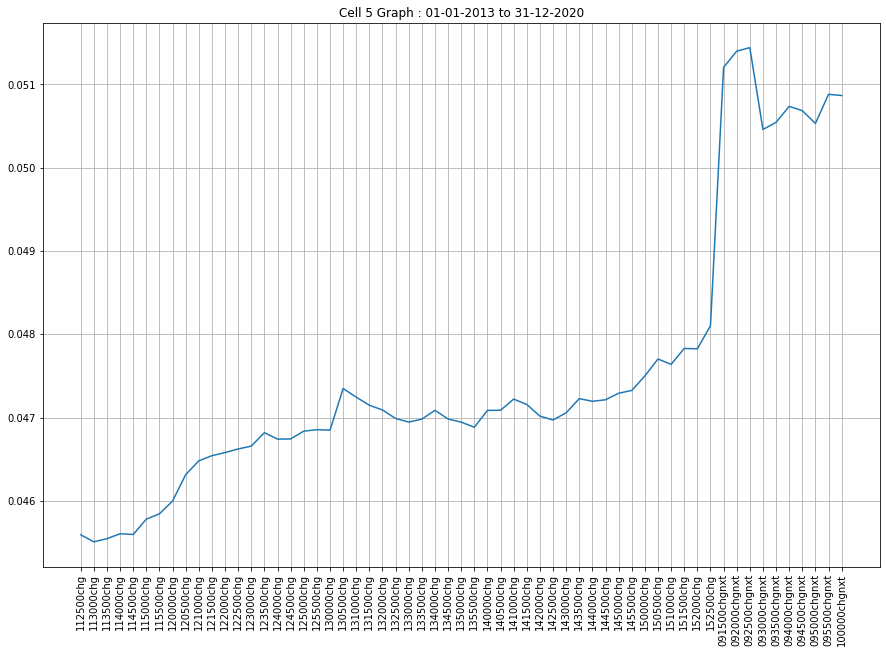

In [94]:
# remove 'Unnamed' columns from csv
remove_cols = [col for col in df.columns if 'Unnamed' in col]
df.drop(remove_cols, axis='columns', inplace=True)

# change date format to datetime
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

# filter date range
df1 = df[(df['Date'] >= startDate) & (df['Date'] <= endDate)]

# remove % symbol from column values
df1 = df1.replace('%', '', regex=True)

# convert column values to numeric
df1.loc[:, ~df1.columns.isin(['Ticker', 'Date'])] = df1.loc[:, ~df1.columns.isin(['Ticker', 'Date'])].apply(pd.to_numeric)

# create dictionary to store column names according to their index
my_dict = dict() 
for index,value in enumerate(df1.columns):
    my_dict[index] = value

val_list = list(my_dict.values())

# filter rows according to the gap
if gap > 0:
    df2 = df1[(df1[my_dict[val_list.index(timestamp) - 1]] >= gap)]
elif gap < 0:
    df2 = df1[(df1[my_dict[val_list.index(timestamp) - 1]] <= gap)]
    
# select columns for plotting the graph
df3 = df2.loc[:, timestamp: '100000chgnxt']

# calculate mean of all the required timestamps 
x = df3.mean().index
y = df3.mean().values
# print(x, y, len(x), len(y))

# graph plot
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(x, y)
plt.xticks(rotation=90)
startDate = datetime.datetime.strptime(str(startDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
endDate = datetime.datetime.strptime(str(endDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
plt.title('Cell 5 Graph : ' + startDate + ' to ' + endDate)
plt.grid()
plt.show()

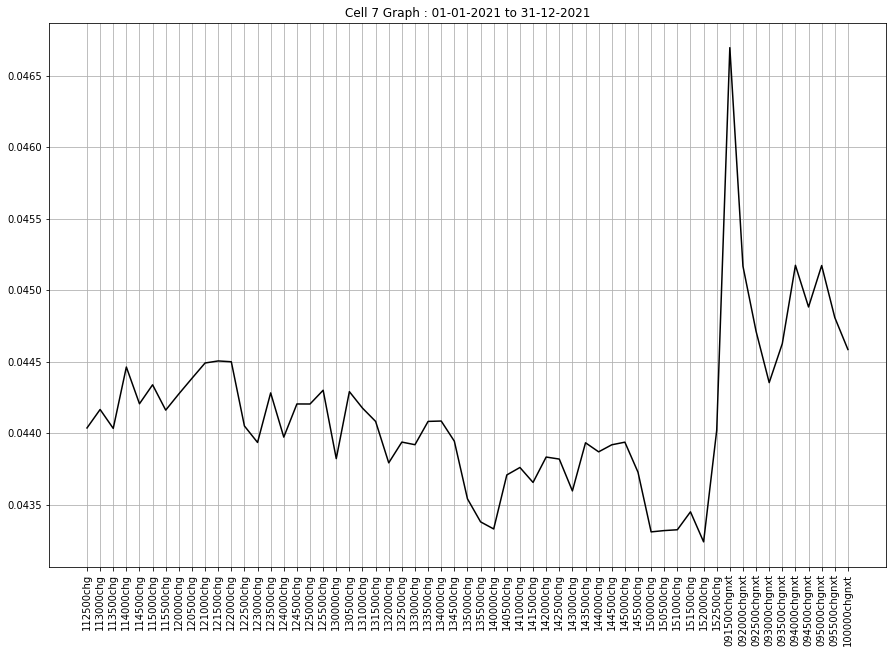

In [98]:
# remove 'Unnamed' columns from csv
remove_cols = [col for col in df.columns if 'Unnamed' in col]
df.drop(remove_cols, axis='columns', inplace=True)

# change date format
df['Date'] =  pd.to_datetime(df['Date'], format='%d-%m-%Y')

# select date range
df1 = df[(df['Date'] >= startDate) & (df['Date'] <= endDate)]

# remove % symbol from values
df1 = df1.replace('%', '', regex=True)

# convert values to numeric
df1.loc[:, ~df1.columns.isin(['Ticker', 'Date'])] = df1.loc[:, ~df1.columns.isin(['Ticker', 'Date'])].apply(pd.to_numeric)

my_dict = dict() 
for index,value in enumerate(df1.columns):
    my_dict[index] = value

val_list = list(my_dict.values())

# select gap
if gap > 0:
    df2 = df1[(df1[my_dict[val_list.index(timestamp) - 1]] >= gap)]
elif gap < 0:
    df2 = df1[(df1[my_dict[val_list.index(timestamp) - 1]] <= gap)]

# select columns for plotting 
df3 = df2.loc[:, timestamp: '100000chgnxt']

x = df3.mean().index
y = df3.mean().values
# print(x, y, len(x), len(y))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

# graph plot
plt.plot(x, y, 'k')
plt.xticks(rotation=90)
startDate = datetime.datetime.strptime(str(startDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
endDate = datetime.datetime.strptime(str(endDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
plt.title('Cell 7 Graph : ' + startDate + ' to ' + endDate)
plt.grid()
plt.show()

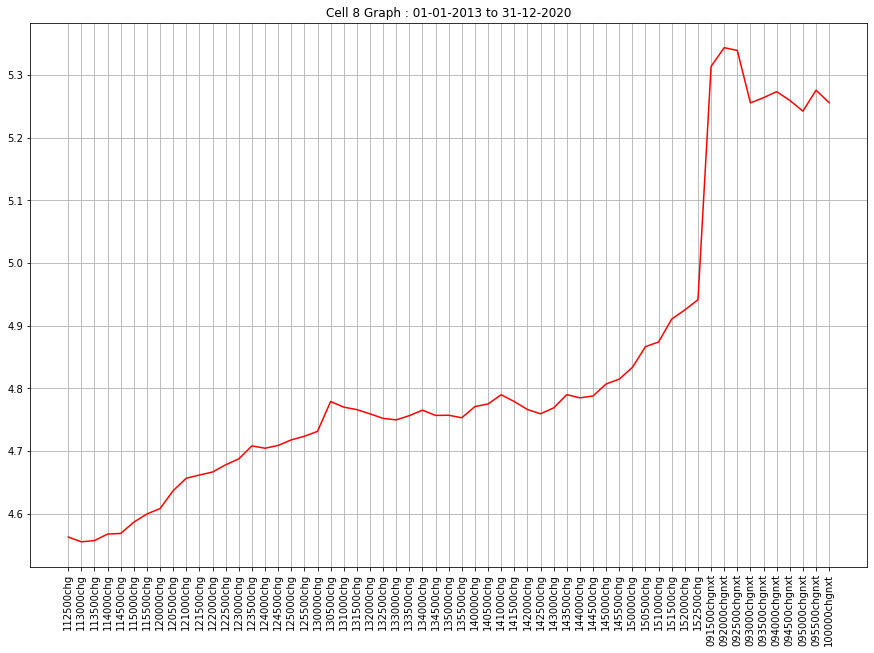

In [102]:
# remove 'Unnamed' columns from csv
remove_cols = [col for col in equity_df.columns if 'Unnamed' in col]
equity_df.drop(remove_cols, axis='columns', inplace=True)


# change date format
equity_df['Date'] =  pd.to_datetime(equity_df['Date'], format='%d-%m-%Y')

# select date range
equity_df1 = equity_df[(equity_df['Date'] >= startDate) & (equity_df['Date'] <= endDate)]

# remove % symbol from values
equity_df1 = equity_df1.replace('%', '', regex=True)

# convert values to numeric
equity_df1.loc[:, ~equity_df1.columns.isin(['Ticker', 'Date'])] = equity_df1.loc[:, ~equity_df1.columns.isin(['Ticker', 'Date'])].apply(pd.to_numeric)

my_dict = dict() 
for index,value in enumerate(equity_df1.columns):
    my_dict[index] = value

val_list = list(my_dict.values())

# select gap
if gap > 0:
    equity_df2 = equity_df1[(equity_df1[my_dict[val_list.index(timestamp) - 1]] >= gap)]
elif gap < 0:
    equity_df2 = equity_df1[(equity_df1[my_dict[val_list.index(timestamp) - 1]] <= gap)]

# select columns for plotting 
equity_df3 = equity_df2.loc[:, timestamp: '100000chgnxt']

x = equity_df3.mean().index
y = equity_df3.mean().values
# print(x, y, len(x), len(y))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

# graph plot
plt.plot(x, y, 'r')
plt.xticks(rotation=90)
startDate = datetime.datetime.strptime(str(startDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
endDate = datetime.datetime.strptime(str(endDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
plt.title('Cell 8 Graph : ' + startDate + ' to ' + endDate)
plt.grid()
plt.show()

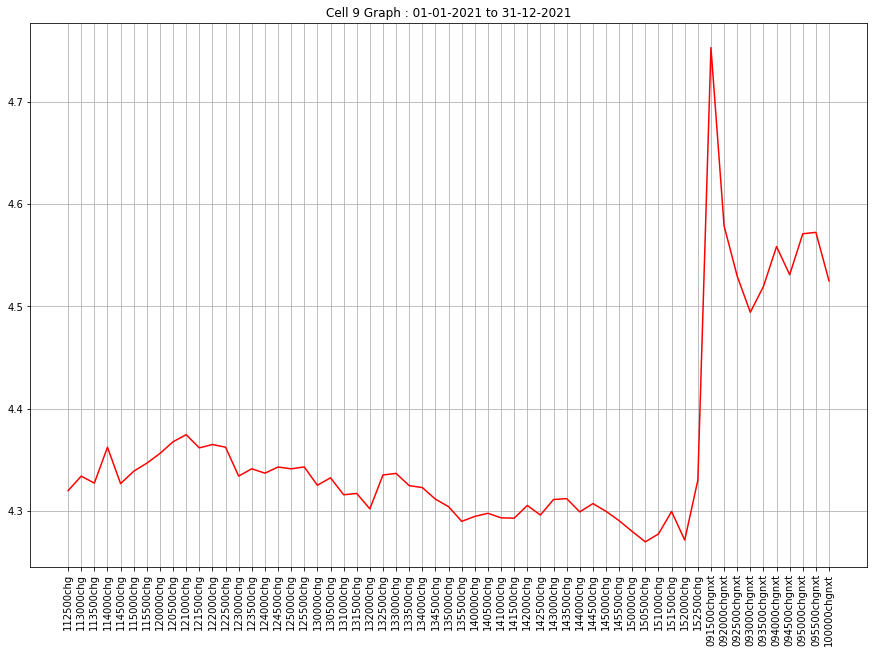

[4.31968725 4.3338332  4.32704892 4.36214916 4.32650361 4.33867682
 4.34655172 4.35607859 4.36750601 4.37445068 4.3614996  4.36481957
 4.36218123 4.33389735 4.34106656 4.33676022 4.34279872 4.34102646
 4.34287089 4.32493184 4.33225341 4.31562951 4.31691259 4.30182037
 4.33502807 4.33652767 4.32456295 4.32267041 4.31131516 4.30397755
 4.28960706 4.29444266 4.297498   4.29305533 4.29270249 4.30516439
 4.29579791 4.31095429 4.31190056 4.29886929 4.30699278 4.29943063
 4.29026464 4.27963913 4.26955092 4.27725742 4.29924619 4.27123496
 4.32989575 4.75327185 4.57888532 4.52967121 4.49423416 4.51950281
 4.55862069 4.5310425  4.57109864 4.57248597 4.52492382]


In [105]:
# remove 'Unnamed' columns from csv
remove_cols = [col for col in equity_df.columns if 'Unnamed' in col]
equity_df.drop(remove_cols, axis='columns', inplace=True)


# change date format
equity_df['Date'] =  pd.to_datetime(equity_df['Date'], format='%d-%m-%Y')

# select date range
equity_df1 = equity_df[(equity_df['Date'] >= startDate) & (equity_df['Date'] <= endDate)]

# remove % symbol from values
equity_df1 = equity_df1.replace('%', '', regex=True)

# convert values to numeric
equity_df1.loc[:, ~equity_df1.columns.isin(['Ticker', 'Date'])] = equity_df1.loc[:, ~equity_df1.columns.isin(['Ticker', 'Date'])].apply(pd.to_numeric)

my_dict = dict() 
for index,value in enumerate(equity_df1.columns):
    my_dict[index] = value

val_list = list(my_dict.values())

# select gap
if gap > 0:
    equity_df2 = equity_df1[(equity_df1[my_dict[val_list.index(timestamp) - 1]] >= gap)]
elif gap < 0:
    equity_df2 = equity_df1[(equity_df1[my_dict[val_list.index(timestamp) - 1]] <= gap)]

# select columns for plotting 
equity_df3 = equity_df2.loc[:, timestamp: '100000chgnxt']

x = equity_df3.mean().index
y = equity_df3.mean().values
# print(x, y, len(x), len(y))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

# graph plot
plt.plot(x, y, 'r')
plt.xticks(rotation=90)
startDate = datetime.datetime.strptime(str(startDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
endDate = datetime.datetime.strptime(str(endDate)[:10], "%Y-%m-%d").strftime("%d-%m-%Y")
plt.title('Cell 9 Graph : ' + startDate + ' to ' + endDate)
plt.grid()
plt.show()

print(y)